### Introduction

In this project, I will be analyzing Tesla stocks from last 6 years and predicting future price for the stock using LSTM network.

The dependencies required for the project are:
1. Pandas.
2. Numpy.
3. Keras.
4. Tensorflow.
5. Matplotlib.
6. Scikit Learn (Sklearn)

The goal of the project is to build a model that predicts the stock values of Tesla based on a window of values from previous days.

### Data Extraction

Let us first start with data extraction. The data is available in csv format at the link: 
https://www.nasdaq.com/symbol/tsla/historical.
After data has been extracted, the data can be stored as a  dataframe by the paandas library.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Downloads/TeslaSixYearData.csv', parse_dates = True, index_col = 0)
df.head()

,close,volume,open,high,low
date,,,,,
NaT,NaN,NaN,NaN,NaN,NaN
2019-08-16,219.94,5207376.0,216.66,222.24,216.02
2019-08-15,215.64,8231952.0,220.86,221.56,211.55
2019-08-14,219.62,9562591.0,231.21,231.50,216.69
2019-08-13,235.00,4868998.0,228.81,236.00,227.55


Let us delete the first column as it does not contain any values.

In [2]:
df = df.iloc[1:]
df.head()

,close,volume,open,high,low
date,,,,,
2019-08-16,219.94,5207376.0,216.66,222.24,216.02
2019-08-15,215.64,8231952.0,220.86,221.56,211.55
2019-08-14,219.62,9562591.0,231.21,231.50,216.69
2019-08-13,235.00,4868998.0,228.81,236.00,227.55
2019-08-12,229.01,4663937.0,232.99,235.77,228.75


Let's see various statistical values of all the features except date.

In [3]:
df.describe()

,close,volume,open,high,low
count,1511.000000,1.511000e+03,1511.000000,1511.000000,1511.000000
mean,252.700330,6.811439e+06,252.707844,256.962515,248.176838
std,57.892947,4.271300e+06,57.932098,58.627883,57.066188
min,120.500000,7.102770e+05,119.380000,122.720000,116.100000
25%,208.975000,4.071516e+06,209.690000,213.474950,206.310000
50%,243.150000,5.712255e+06,243.580000,247.130000,238.750000
75%,301.490000,8.101074e+06,301.415000,306.870000,295.435000
max,385.000000,3.359729e+07,386.690000,389.610000,379.345000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2019-08-16 to 2013-08-16
Data columns (total 5 columns):
close     1511 non-null float64
volume    1511 non-null float64
open      1511 non-null float64
high      1511 non-null float64
low       1511 non-null float64
dtypes: float64(5)
memory usage: 70.8 KB


Let us the variation of the numerical values with time by plotting it.

In [5]:
from matplotlib import pyplot as plt
df['close'].plot()

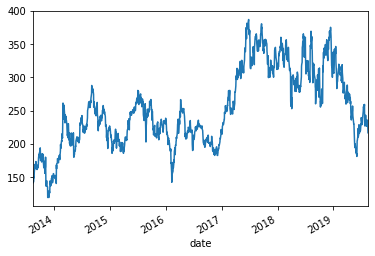

In [6]:
df['open'].plot()

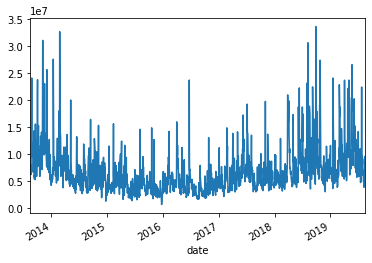

In [7]:
df['volume'].plot()

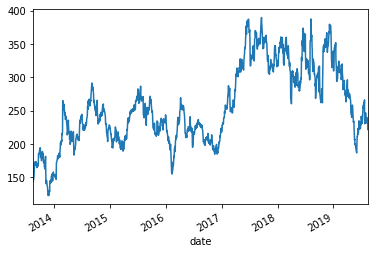

In [8]:
df['high'].plot()

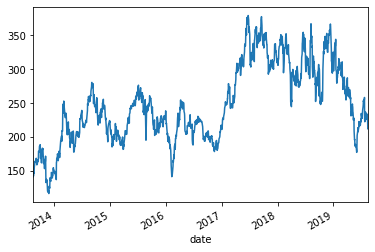

In [9]:
df['low'].plot()

Now, let's create a new feature 'avg' which will represent the average value of stock for the day.
i.e avg = (open + close) / 2

In [10]:
avg = pd.DataFrame((df['open'] + df['close']) / 2, columns = ['avg'])
df = pd.concat([df, avg], axis = 1)
df.head()

,close,volume,open,high,low,avg
date,,,,,,
2019-08-16,219.94,5207376.0,216.66,222.24,216.02,218.300
2019-08-15,215.64,8231952.0,220.86,221.56,211.55,218.250
2019-08-14,219.62,9562591.0,231.21,231.50,216.69,225.415
2019-08-13,235.00,4868998.0,228.81,236.00,227.55,231.905
2019-08-12,229.01,4663937.0,232.99,235.77,228.75,231.000


Now, let's normalize the data so that it's values lie between 0 and 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['avg']]), columns = ['avg'], index = df.index)
df_scaled.head()

,avg
date,
2019-08-16,0.373978
2019-08-15,0.373788
2019-08-14,0.401030
2019-08-13,0.425706
2019-08-12,0.422265


Now, let's predict the avg value of the stock using avg feature. The LSTM model will be used to predict the future values of the avg feature based on certain number of past values. Let this number be represented as window.

Let us consider a model in which the avg value depends on past 30 days. Therefore, for each time step, the 30 values will be input and output will be the prediction based on these past 30 values according to our LSTM model.

In [12]:
window = 30

Let us segragate between the train and test data. Let the test data be the last 30 days i.e we will predict the last 30 days' avg stock value price.

In [13]:
test_size = 300
avg_list = list(df_scaled['avg'])
test = avg_list[-test_size:]
test = np.array(test)
test

array([0.4373693 , 0.42661876, 0.43673244, 0.41312117, 0.4200981 ,
       0.39198129, 0.39888217, 0.40954717, 0.42447055, 0.4594312 ,
       0.53112049, 0.53134862, 0.52891525, 0.53205201, 0.51022775,
       0.49758564, 0.46112315, 0.4747348 , 0.47408844, 0.48471541,
       0.49349835, 0.5007034 , 0.48619824, 0.50406829, 0.52741341,
       0.54617695, 0.53973233, 0.52471389, 0.54817307, 0.6079997 ,
       0.61003384, 0.60971066, 0.61136459, 0.60805673, 0.60845595,
       0.62767575, 0.62541348, 0.60784761, 0.56750694, 0.54345842,
       0.54535949, 0.54530246, 0.53393407, 0.51602601, 0.51515152,
       0.514239  , 0.52421961, 0.53859169, 0.53916201, 0.53988442,
       0.53693776, 0.52880119, 0.52264172, 0.49315615, 0.49927759,
       0.4713701 , 0.44880423, 0.44298696, 0.41724649, 0.40431923,
       0.40104939, 0.40253222, 0.3976845 , 0.39239953, 0.39335006,
       0.38519448, 0.3838067 , 0.37624045, 0.37278069, 0.36439679,
       0.37850272, 0.39243755, 0.39315996, 0.37804646, 0.37405

Now, let's make the training set. 

In [14]:
len_train_set = len(avg_list) - len(test)

In [15]:
X_train = []
y_train = []
for l in range(0, (len_train_set - window)):
    X_train.append(avg_list[l:window + l])
    y_train.append(avg_list[window + l])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
X_train

array([[0.37397818, 0.37378807, 0.40103038, ..., 0.44331014, 0.41661914,
        0.42146686],
       [0.37378807, 0.40103038, 0.42570625, ..., 0.41661914, 0.42146686,
        0.43304437],
       [0.40103038, 0.42570625, 0.42226531, ..., 0.42146686, 0.43304437,
        0.44562944],
       ...,
       [0.34996768, 0.3542641 , 0.37264743, ..., 0.46448804, 0.45040113,
        0.45502072],
       [0.3542641 , 0.37264743, 0.40397704, ..., 0.45040113, 0.45502072,
        0.44197939],
       [0.37264743, 0.40397704, 0.41253184, ..., 0.45502072, 0.44197939,
        0.41070682]])

In [17]:
y_train

array([0.43304437, 0.44562944, 0.40599217, ..., 0.44197939, 0.41070682,
       0.44034447])

Let's reshape the X_train array according to format (batch_size, time_step, input_dim)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Now, let's build the model with Keras and Tensorflow.

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization, Add
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

Using TensorFlow backend.


In [20]:
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(time))

In [21]:
model = Sequential()
model.add(LSTM(30, activation='tanh', recurrent_activation='hard_sigmoid', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(30, activation='tanh', recurrent_activation='hard_sigmoid', return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(30, activation='tanh', recurrent_activation='hard_sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1))

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.fit(X_train, y_train, 32, epochs = 100, callbacks = [tensorboard])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1181/1181 [==============================] - 5s 4ms/step - loss: 0.2148
Epoch 2/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0438
Epoch 3/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0093
Epoch 4/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0087
Epoch 5/100
1181/1181 [==============================] - 2s 2ms/step - loss: 0.0078
Epoch 6/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0074
Epoch 7/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0074
Epoch 8/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0065
Epoch 9/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0063
Epoch 10/100
1181/1181 [==============================] - 2s 1ms/step - loss: 0.0

The tensorboard interface is loaded below. The graph visualizer tool helps us to visualize the computational graph of the model.

In [24]:
%load_ext tensorboard.notebook
%tensorboard --logdir logs/

Reusing TensorBoard on port 6008 (pid 6585), started 0:49:23 ago. (Use '!kill 6585' to kill it.)

Now, creating X_test,

In [25]:
X_test = []
for l in range(len_train_set, (len(avg_list) - window)):
    X_test.append(avg_list[l:window + l])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
len(X_test)

270

Now, let us make predictions based on trained data.

In [27]:
scaled_pred = model.predict(X_test)
actual_pred = scaler.inverse_transform(scaled_pred)
actual_pred

array([[292.54504],
       [294.97516],
       [295.43204],
       [295.29156],
       [294.30127],
       [294.286  ],
       [298.91367],
       [298.9818 ],
       [295.16312],
       [285.32404],
       [278.51672],
       [278.10175],
       [278.51385],
       [276.4506 ],
       [272.2175 ],
       [271.29208],
       [270.9602 ],
       [273.26694],
       [276.90826],
       [277.55414],
       [277.63635],
       [276.7055 ],
       [274.55777],
       [272.73355],
       [265.8367 ],
       [266.0354 ],
       [260.07294],
       [254.19499],
       [251.84703],
       [246.1433 ],
       [242.29439],
       [240.95377],
       [241.25577],
       [240.46187],
       [239.10324],
       [238.87323],
       [237.04771],
       [236.19589],
       [234.37097],
       [233.14932],
       [231.11288],
       [233.58   ],
       [237.33635],
       [238.41203],
       [235.21725],
       [233.24692],
       [235.84695],
       [234.06535],
       [238.54276],
       [243.98547],


Now, let us test the accuracy of the model using visualisation by plotting the actual value and predicted test values.

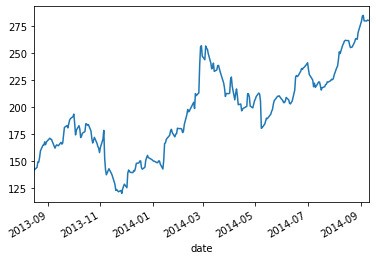

In [28]:
df['avg'].iloc[-len(X_test):].plot()

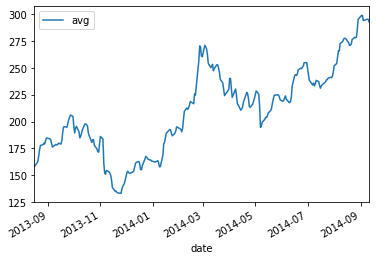

In [29]:
date_index = df.index
df_pred = pd.DataFrame(actual_pred, columns = ['avg'], index = date_index[-len(X_test):])
df_pred.plot()

Plotting both the graphs on same axes, we have:

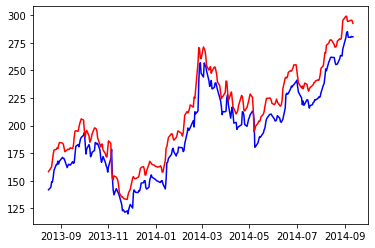

In [30]:
plt.plot(df['avg'].iloc[-len(X_test):], 'b')
plt.plot(df_pred, 'r')

Hence, the predictions obtained are pretty close to the actual values of the plot. Therefore the model accuracy is decent.